**Sales Performance Report**

In [258]:
# Importing Libraries
from datetime import date
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)

pwd = os.getcwd()

In [ ]:
imported_data = pd.read_csv('Retail_Store_data.csv',parse_dates = ['Order Date','Ship Date'],encoding = 'latin1')

Basic Inspection of Data

In [260]:
imported_data.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,NaN,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [261]:
imported_data.tail(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
51285,32593,CA-2014-115427,2014-12-31,2015-04-01,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,United States,94533.0,US,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
51286,47594,MO-2014-2560,2014-12-31,2015-05-01,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,Morocco,NaN,Africa,Africa,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
51287,8857,MX-2014-110527,2014-12-31,2015-02-01,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,Nicaragua,NaN,LATAM,Central,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
51288,6852,MX-2014-114783,2014-12-31,2015-06-01,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,Mexico,NaN,LATAM,North,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium
51289,36388,CA-2014-156720,2014-12-31,2015-04-01,Standard Class,JM-15580,Jill Matthias,Consumer,Loveland,Colorado,United States,80538.0,US,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,0.17,Medium


In [262]:
imported_data.shape

(51290, 24)

In [263]:
imported_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [264]:
# Checking for null/missing values
imported_data.isnull().sum().sort_values(ascending=False)

Postal Code       41296
Row ID                0
Region                0
Shipping Cost         0
Profit                0
Discount              0
Quantity              0
Sales                 0
Product Name          0
Sub-Category          0
Category              0
Product ID            0
Market                0
Order ID              0
Country               0
State                 0
City                  0
Segment               0
Customer Name         0
Customer ID           0
Ship Mode             0
Ship Date             0
Order Date            0
Order Priority        0
dtype: int64

In [265]:
# Unique Values
all_cols = imported_data.columns
for col in all_cols:
    print("{}: {}".format(col,len(imported_data[col].unique())))

Row ID: 51290
Order ID: 25035
Order Date: 1430
Ship Date: 1464
Ship Mode: 4
Customer ID: 1590
Customer Name: 795
Segment: 3
City: 3636
State: 1094
Country: 147
Postal Code: 632
Market: 7
Region: 13
Product ID: 10292
Category: 3
Sub-Category: 17
Product Name: 3788
Sales: 22995
Quantity: 14
Discount: 27
Profit: 24575
Shipping Cost: 10037
Order Priority: 4


In [266]:
# sorting data by order date
imported_data.sort_values(by=['Order Date'], inplace=True, ascending=True)

In [267]:
#  Count NaN values under an entire DataFrame:
imported_data.isna().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [268]:
imported_data['Ship Mode'].value_counts()

Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: Ship Mode, dtype: int64

In [269]:
imported_data['Segment'].value_counts()

Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64

In [270]:
imported_data['City'].value_counts()

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Santo Domingo    443
                ... 
Poitiers           1
Rock Hill          1
Carapicuíba        1
Neuwied            1
Toliara            1
Name: City, Length: 3636, dtype: int64

In [271]:
imported_data['Country'].value_counts()

United States    9994
Australia        2837
France           2827
Mexico           2644
Germany          2065
                 ... 
Swaziland           2
Burundi             2
Chad                2
Bahrain             2
Eritrea             2
Name: Country, Length: 147, dtype: int64

In [272]:
imported_data['Market'].value_counts()

APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: Market, dtype: int64

In [273]:
imported_data['Region'].value_counts()

Central           11117
South              6645
EMEA               5029
North              4785
Africa             4587
Oceania            3487
West               3203
Southeast Asia     3129
East               2848
North Asia         2338
Central Asia       2048
Caribbean          1690
Canada              384
Name: Region, dtype: int64

In [274]:
imported_data['Category'].value_counts()

Office Supplies    31273
Technology         10141
Furniture           9876
Name: Category, dtype: int64

In [275]:
imported_data['Sub-Category'].value_counts()

Binders        6152
Storage        5059
Art            4883
Paper          3538
Chairs         3434
Phones         3357
Furnishings    3170
Accessories    3075
Labels         2606
Envelopes      2435
Supplies       2425
Fasteners      2420
Bookcases      2411
Copiers        2223
Appliances     1755
Machines       1486
Tables          861
Name: Sub-Category, dtype: int64

In [276]:
imported_data['Order Priority'].value_counts()

Medium      29433
High        15501
Critical     3932
Low          2424
Name: Order Priority, dtype: int64

In [277]:
#Fill NA/NaN values using the specified method.
# retail_data.fillna('NA', inplace=True)

Data Cleaning and Manipulation

In [278]:
#columns_to_drop = ['Row ID', 'Postal Code']
retail_data = imported_data.drop(columns=['Row ID', 'Postal Code']) #Dropping the Row ID, Postal Code column
retail_data.shape

(51290, 22)

In [279]:
# Creating new columns for Unit price, Month, Year, Order Interval
retail_data['Unit Price'] = retail_data['Sales'] / retail_data['Quantity']
retail_data['Month'] = pd.DatetimeIndex(retail_data['Order Date']).month_name().str[ : 3]
retail_data['Year'] = pd.DatetimeIndex(retail_data['Order Date']).year
retail_data['Order Interval'] = (retail_data['Ship Date'] - retail_data['Order Date'])/np.timedelta64(1, 'D')

In [280]:
retail_data.describe()

,Sales,Quantity,Discount,Profit,Shipping Cost,Unit Price,Year,Order Interval
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.610982,26.375915,71.657487,2012.777208,5.079041
std,487.565361,2.278766,0.212280,174.340972,57.296804,113.581515,1.098931,97.771493
min,0.444000,1.000000,0.000000,-6599.978000,0.000000,0.336000,2011.000000,-322.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000,11.799900,2012.000000,1.000000
50%,85.053000,3.000000,0.000000,9.240000,7.790000,29.400000,2013.000000,4.000000
75%,251.053200,5.000000,0.200000,36.810000,24.450000,82.160000,2014.000000,59.000000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,3773.080000,2014.000000,214.000000


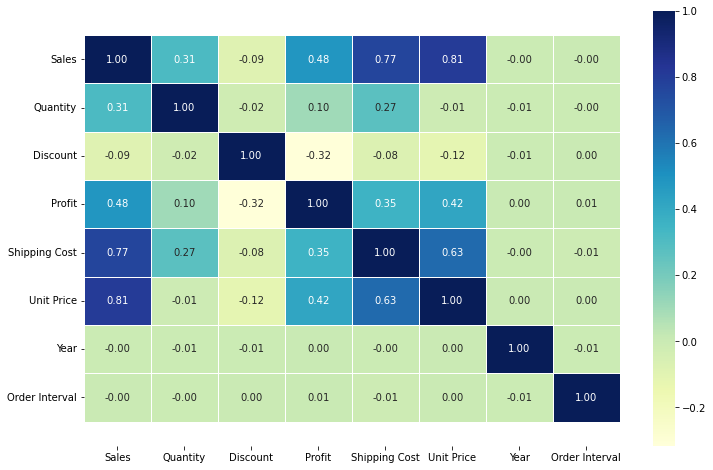

In [281]:
# Visualizing the correlation matrix
corr_matrix = retail_data.corr()
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.heatmap(corr_matrix, annot=True,linewidths=0.5,fmt=".2f", cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

***Exploratory Data Analysis (EDA)***

1. Sales & Profit Per Market

In [282]:
sales_profit = pd.DataFrame(retail_data.groupby(["Market"])["Sales","Profit"].sum())
sales_profit

C:\Users\zkowser\AppData\Local\Temp\ipykernel_20776\818098690.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales_profit = pd.DataFrame(retail_data.groupby(["Market"])["Sales","Profit"].sum())


,Sales,Profit
Market,,
APAC,3.585744e+06,436000.04900
Africa,7.837732e+05,88871.63100
Canada,6.692817e+04,17817.39000
EMEA,8.061613e+05,43897.97100
EU,2.938089e+06,372829.74150
LATAM,2.164605e+06,221643.48708
US,2.297201e+06,286397.02170


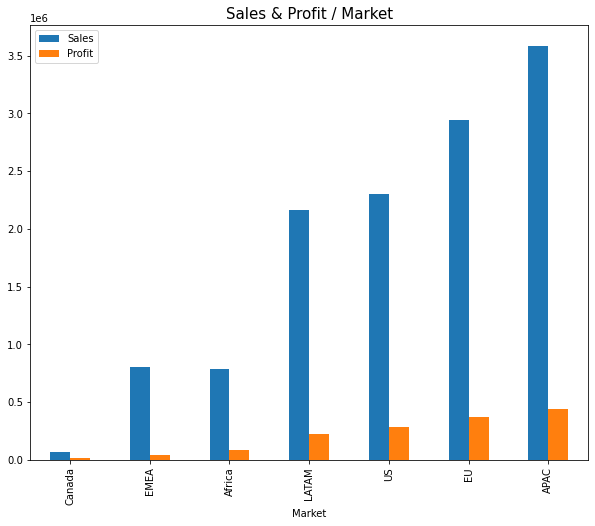

In [283]:
sorting_profit = sales_profit.sort_values("Profit", ascending=True)
sorting_profit.plot(kind="bar", figsize=(10,8))
plt.title("Sales & Profit / Market",fontsize = 15)
plt.show()

2. From the graph above, the Most Profitable Market is the APAC Market & the Least Profitable Market is the Canada Market.

3. Products with least amount of sales

In [284]:
least_sold = pd.DataFrame(retail_data.groupby("Product Name")["Quantity", "Sales","Market","Unit Price","Shipping Cost","Discount"].sum().nsmallest(10,columns = "Quantity"))
least_sold

C:\Users\zkowser\AppData\Local\Temp\ipykernel_20776\1999111862.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  least_sold = pd.DataFrame(retail_data.groupby("Product Name")["Quantity", "Sales","Market","Unit Price","Shipping Cost","Discount"].sum().nsmallest(10,columns = "Quantity"))


,Quantity,Sales,Unit Price,Shipping Cost,Discount
Product Name,,,,,
Boston 1900 Electric Pencil Sharpener,1,14.980,14.980,2.08,0.00
"Bush Saratoga Collection 5-Shelf Bookcase, Hanover Cherry, *Special Order",1,119.833,119.833,13.47,0.15
"Chromcraft Training Table, Adjustable Height",1,38.144,38.144,1.53,0.80
Global Enterprise Series Seating Low-Back Swivel/Tilt Chairs,1,207.184,207.184,26.94,0.20
Penpower WorldCard Pro Card Scanner,1,91.475,91.475,10.93,0.50
Xerox 20,1,6.480,6.480,0.61,0.00
Avery 5,2,5.760,2.880,1.10,0.00
Avery Hi-Liter Pen Style Six-Color Fluorescent Set,2,7.700,3.850,0.61,0.00
"Barricks Non-Folding Utility Table with Steel Legs, Laminate Tops",2,136.464,68.232,29.02,0.20


4. Which month does the company records more sales?

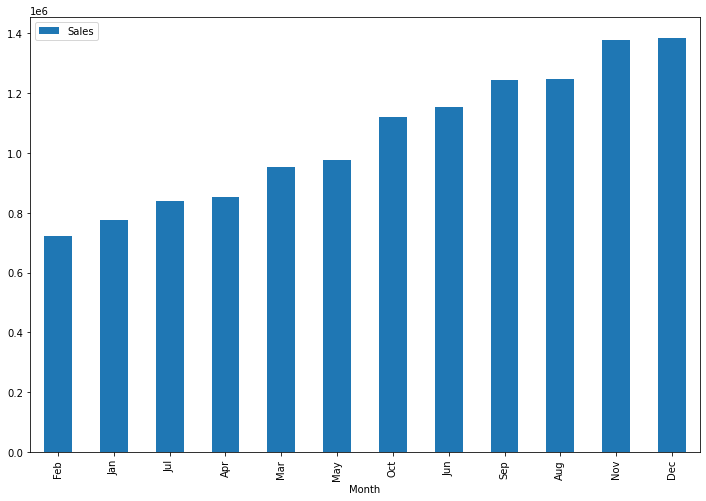

In [285]:
x = retail_data.groupby(by='Month')[['Sales']].sum()
y = x.sort_values(by=['Sales'],ascending=True)

y.plot(kind='bar', figsize=(12,8))
plt.show()

November & December has the highest sales

5. The trend of sales for each year

2011

In [286]:
Year2011_data = retail_data.loc[(retail_data.Year == 2011)]
Year2011_data.head(1)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Unit Price,Month,Year,Order Interval
0,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.3,2,0.0,106.14,35.46,Medium,204.15,Jan,2011,151.0


In [287]:
data2011_trend = Year2011_data.groupby('Month')['Sales'].sum().reset_index()
data2011_trend

,Month,Sales
0,Apr,128833.47034
1,Aug,219223.49524
2,Dec,292359.96752
3,Feb,134969.94086
4,Jan,138241.30042
5,Jul,162034.69756
6,Jun,189338.43966
7,Mar,171455.59372
8,May,148146.72092
9,Nov,214934.29386


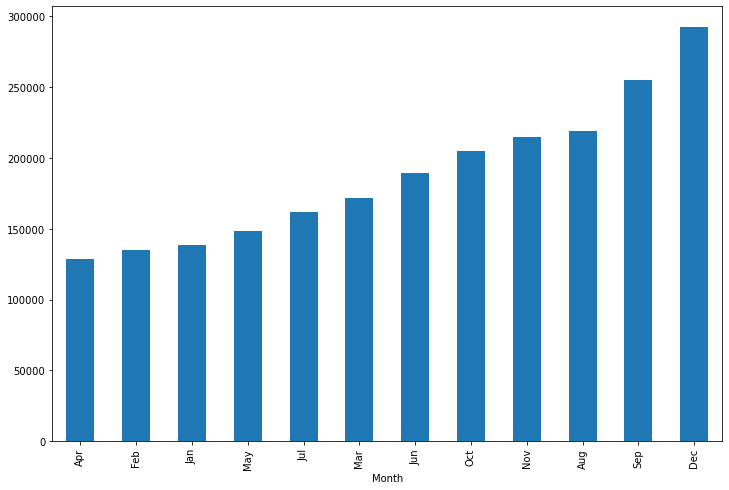

In [288]:
data2011_trend.groupby('Month')['Sales'].sum().sort_values(ascending=True).plot(kind="bar", figsize=(12,8))
plt.show()

2012

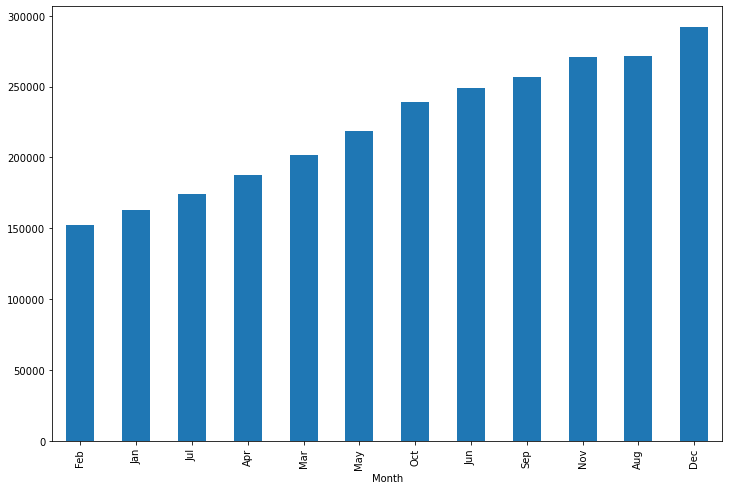

In [289]:
Year2012_data = retail_data.loc[(retail_data.Year == 2012)]
data2012_trend = Year2012_data.groupby('Month')['Sales'].sum().reset_index()
data2012_trend.groupby('Month')['Sales'].sum().sort_values(ascending=True).plot(kind="bar", figsize=(12,8))
plt.show()

2013

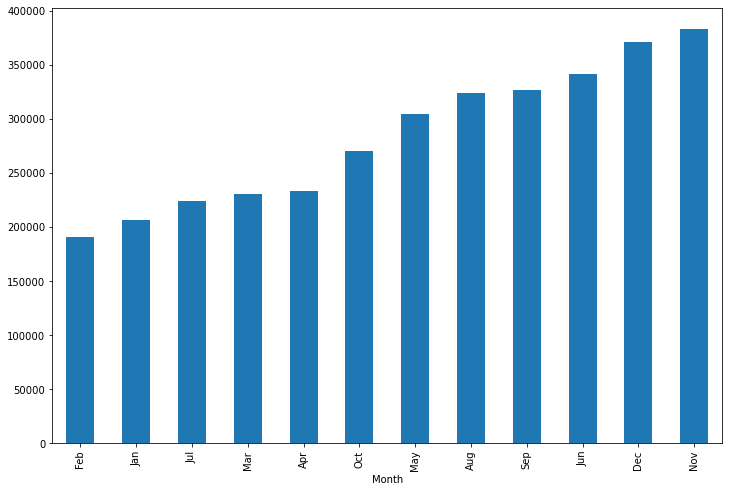

In [290]:
Year2013_data = retail_data.loc[(retail_data.Year == 2013)]
data2013_trend = Year2013_data.groupby('Month')['Sales'].sum().reset_index()
data2013_trend.groupby('Month')['Sales'].sum().sort_values(ascending=True).plot(kind="bar", figsize=(12,8))
plt.show()

2014

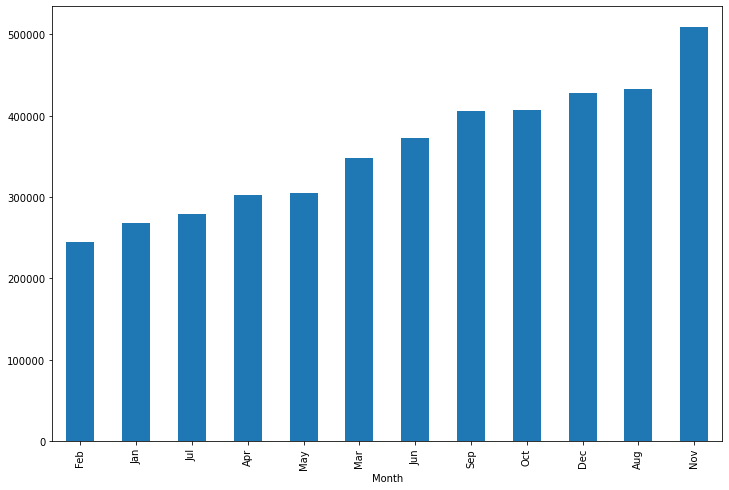

In [291]:
Year2014_data = retail_data.loc[(retail_data.Year == 2014)]
data2014_trend = Year2014_data.groupby('Month')['Sales'].sum().reset_index()
data2014_trend.groupby('Month')['Sales'].sum().sort_values(ascending=True).plot(kind="bar", figsize=(12,8))
plt.show()

Sales Trend from 2011-14 on Line Chart

In [292]:
#Generating Sales of 2011
trend_2011 = pd.DataFrame(Year2011_data.groupby("Month")["Sales"].sum()).reset_index()
#convert ordered month back from month abrv in string to date.time month
trend_2011["Month"] = pd.to_datetime(trend_2011["Month"], format='%b', errors='coerce').dt.month
#sort out based on date.time month
trend_2011 = trend_2011.sort_values(by="Month")

#Generating Sales of 2012
trend_2012 = pd.DataFrame(Year2012_data.groupby("Month")["Sales"].sum()).reset_index()
#convert ordered month back from month abrv in string to date.time month
trend_2012["Month"] = pd.to_datetime(trend_2012["Month"], format='%b', errors='coerce').dt.month
#sort out based on date.time month
trend_2012 = trend_2012.sort_values(by="Month")

#Generating Sales of 2013
trend_2013 = pd.DataFrame(Year2013_data.groupby("Month")["Sales"].sum()).reset_index()
#convert ordered month back from month abrv in string to date.time month
trend_2013["Month"] = pd.to_datetime(trend_2013["Month"], format='%b', errors='coerce').dt.month
#sort out based on date.time month
trend_2013 = trend_2013.sort_values(by="Month")

#Generating Sales of 2014
trend_2014 = pd.DataFrame(Year2014_data.groupby("Month")["Sales"].sum()).reset_index()
#convert ordered month back from month abrv in string to date.time month
trend_2014["Month"] = pd.to_datetime(trend_2014["Month"], format='%b', errors='coerce').dt.month
#sort out based on date.time month
trend_2014 = trend_2014.sort_values(by="Month")

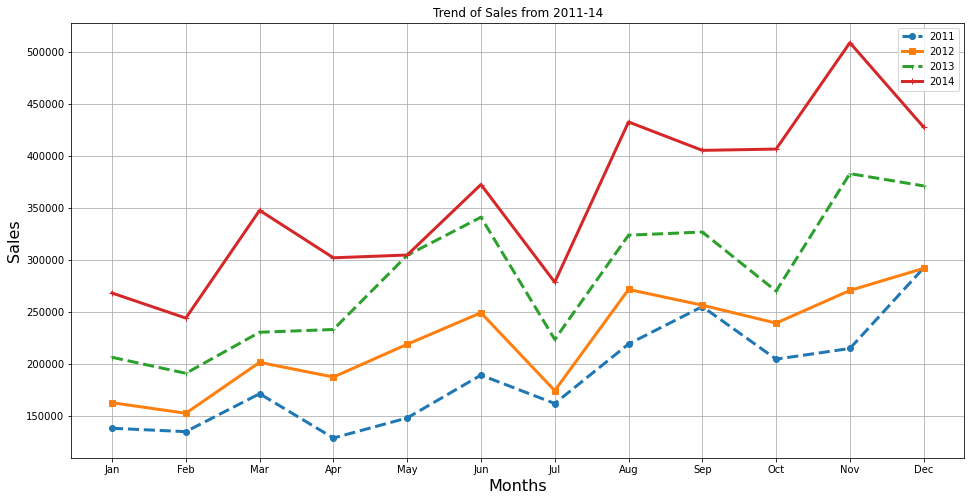

In [293]:
#style.use
plt.figure(figsize=[16,8])
plt.grid()
plt.title("Trend of Sales from 2011-14", fontsize = 12)
plt.xlabel("Months",fontsize=16)
plt.ylabel("Sales",fontsize=16)
label = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
x = trend_2011["Month"]
plt.xticks(x,labels=label)
plt.plot(x,trend_2011["Sales"],label ="2011",lw=3,ls='--', marker='o')
plt.plot(x,trend_2012["Sales"],label="2012",lw=3,ls='-', marker='s')
plt.plot(x,trend_2013["Sales"],label="2013",lw=3,ls='--', marker='1')
plt.plot(x,trend_2014["Sales"],label="2014",lw=3,ls='-', marker='+')
#plt.savefig("Trend_sales.jpg")
plt.legend()
plt.show()

6. Profit trend for each Year.

2011

In [294]:
data_trend = Year2011_data.groupby('Month')['Profit'].sum().reset_index()
data_trend.head()

,Month,Profit
0,Apr,13405.46924
1,Aug,19650.67124
2,Dec,33006.85862
3,Feb,17588.83726
4,Jan,13457.23302


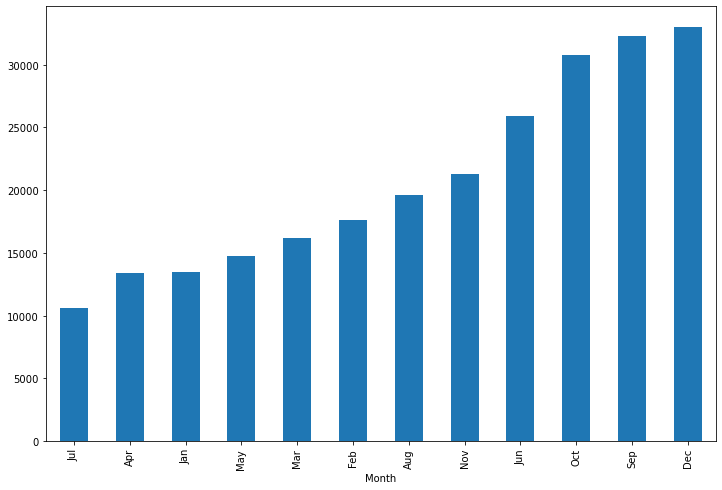

In [295]:
Year2011_data.groupby('Month')['Profit'].sum().sort_values(ascending=True).plot(kind="bar", figsize=(12,8))
plt.show()

2012

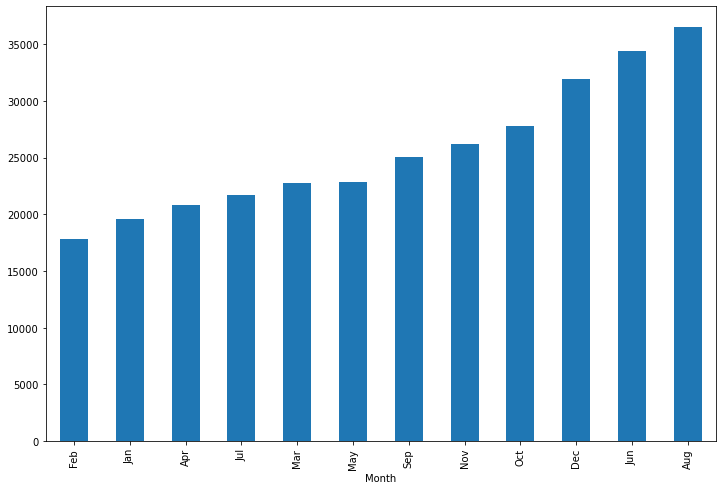

In [296]:
data_trend = Year2012_data.groupby('Month')['Profit'].sum().reset_index()
Year2012_data.groupby('Month')['Profit'].sum().sort_values(ascending=True).plot(kind="bar", figsize=(12,8))
plt.show()

2013

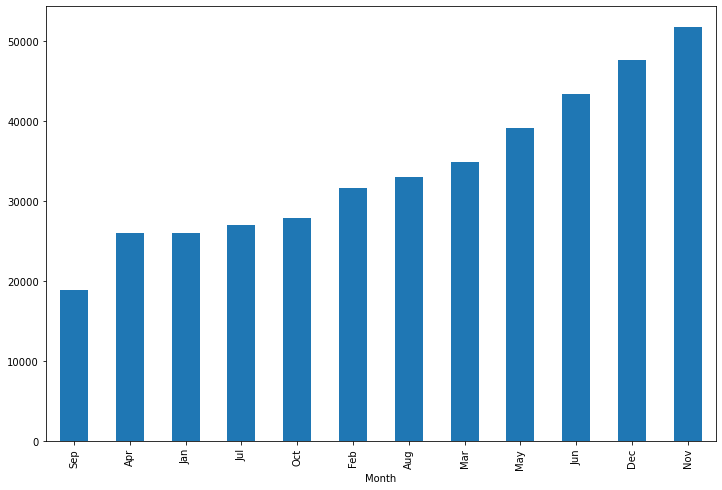

In [297]:
data_trend = Year2013_data.groupby('Month')['Profit'].sum().reset_index()
Year2013_data.groupby('Month')['Profit'].sum().sort_values(ascending=True).plot(kind="bar", figsize=(12,8))
plt.show()

2014

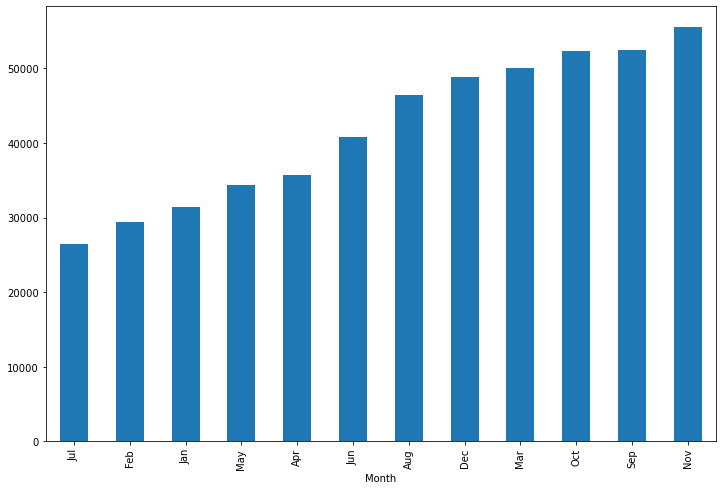

In [298]:
data_trend = Year2014_data.groupby('Month')['Profit'].sum().reset_index()
Year2014_data.groupby('Month')['Profit'].sum().sort_values(ascending=True).plot(kind="bar", figsize=(12,8))
plt.show()

In [299]:
#Generating Profit of 2011
profit_2011 = pd.DataFrame(Year2011_data.groupby("Month")["Profit"].sum()).reset_index()
#convert ordered month back from month abrv in string to date.time month
profit_2011["Month"] = pd.to_datetime(profit_2011["Month"], format='%b', errors='coerce').dt.month
#sort out based on date.time month
profit_2011 = profit_2011.sort_values(by="Month")

#Generating Profit of 2012
profit_2012 = pd.DataFrame(Year2012_data.groupby("Month")["Profit"].sum()).reset_index()
#convert ordered month back from month abrv in string to date.time month
profit_2012["Month"] = pd.to_datetime(profit_2012["Month"], format='%b', errors='coerce').dt.month
#sort out based on date.time month
profit_2012 = profit_2012.sort_values(by="Month")

#Generating Profit of 2013
profit_2013 = pd.DataFrame(Year2013_data.groupby("Month")["Profit"].sum()).reset_index()
#convert ordered month back from month abrv in string to date.time month
profit_2013["Month"] = pd.to_datetime(profit_2013["Month"], format='%b', errors='coerce').dt.month
#sort out based on date.time month
profit_2013 = profit_2013.sort_values(by="Month")

#Generating Profit of 2014
profit_2014 = pd.DataFrame(Year2014_data.groupby("Month")["Profit"].sum()).reset_index()
#convert ordered month back from month abrv in string to date.time month
profit_2014["Month"] = pd.to_datetime(profit_2014["Month"], format='%b', errors='coerce').dt.month
#sort out based on date.time month
profit_2014 = profit_2014.sort_values(by="Month")

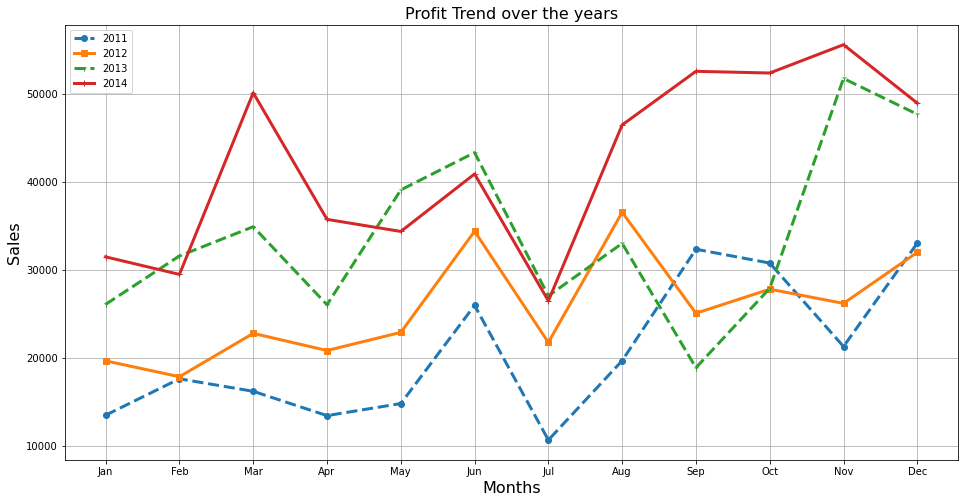

In [300]:
#style.use('dark_background')
plt.figure(figsize=[16,8])
plt.grid()
plt.title("Profit Trend over the years", fontsize = 16)
plt.xlabel("Months",fontsize=16)
plt.ylabel("Sales",fontsize=16)
label = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
x = profit_2011["Month"]
plt.xticks(x,labels=label)
plt.plot(x,profit_2011["Profit"],label ="2011",lw=3,ls='--', marker='o')
plt.plot(x,profit_2012["Profit"],label="2012",lw=3,ls='-', marker='s')
plt.plot(x,profit_2013["Profit"],label="2013",lw=3,ls='--', marker='1')
plt.plot(x,profit_2014["Profit"],label="2014",lw=3,ls='-', marker='+')
#plt.savefig("Trend_profit.jpg")
plt.legend()
plt.show()

Sales Trend over the years

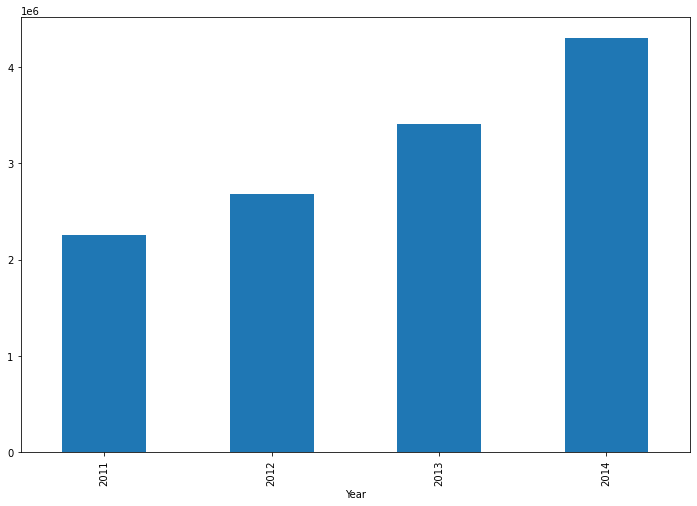

In [301]:
data_sales_trend = retail_data.groupby('Year')['Sales'].sum().reset_index()
retail_data.groupby('Year')['Sales'].sum().sort_values(ascending=True).plot(kind="bar", figsize=(12,8))
#plt.savefig("General_trend.jpg")
plt.show()

8. What is the correlation between sales & discount ?

In [302]:
corr = retail_data['Discount'].corr(retail_data['Sales'])
print("Correlation between discount and sales is: ", round(corr, 2))


Correlation between discount and sales is:  -0.09


Those the correlation between two indicates a weak one of coefficient -0.09.

9. Does the shipping cost affect the sales?


In [303]:
corr = retail_data['Shipping Cost'].corr(retail_data['Sales'])
print("Correlation between Shipping Cost and sales is: ", round(corr, 2))

Correlation between Shipping Cost and sales is:  0.77


Yes, Sales are affected by Shipping Cost of the Products where Correlation is higher.

10. What is the Dominant product category in each market?

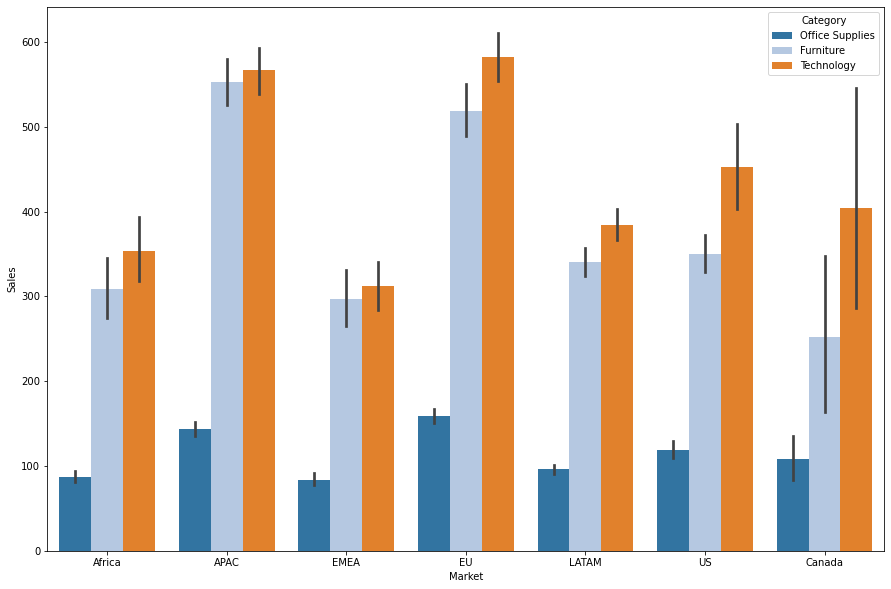

In [304]:
plt.figure(figsize=[15,10])
ax = sns.barplot(x="Market", y="Sales", hue="Category", data=retail_data, palette="tab20")
plt.show()

Technology product category dominant in each market.

11. City with most orders for a given product category?

Office Supplies

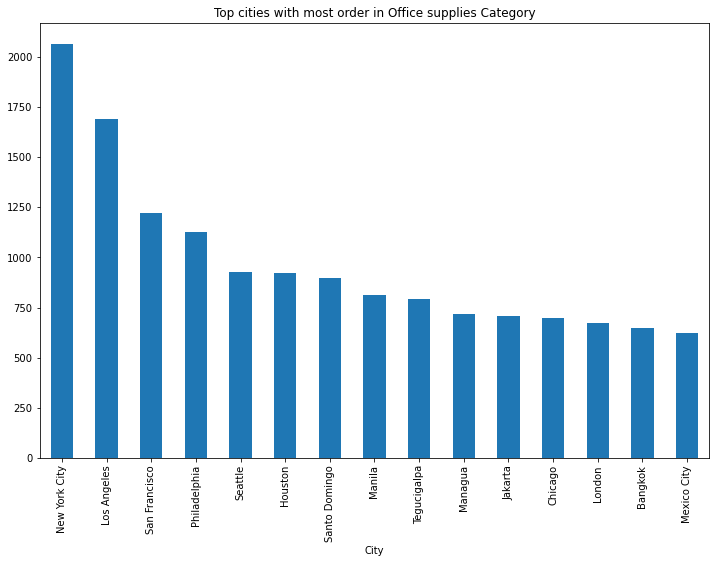

In [305]:
Office_supplies = retail_data.loc[(retail_data.Category == 'Office Supplies')]

# Top 15 cities with the highest order
top_office = Office_supplies.groupby('City')['Quantity'].sum().reset_index().nlargest(15,columns = "Quantity")
top_office.groupby('City')['Quantity'].sum().sort_values(ascending=False).plot(kind="bar", figsize=(12,8), title="Top cities with most order in Office supplies Category")
plt.show()

Furniture

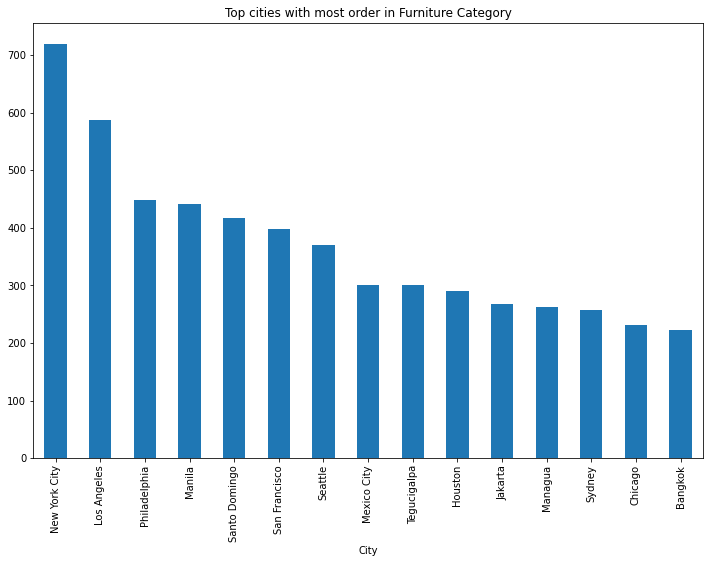

In [306]:
Furniture = retail_data.loc[(retail_data.Category == 'Furniture')]

# Top 15 cities with the highest order
top_furniture = Furniture.groupby('City')['Quantity'].sum().reset_index().nlargest(15,columns = "Quantity")
top_furniture.groupby('City')['Quantity'].sum().sort_values(ascending=False).plot(kind="bar", figsize=(12,8), title="Top cities with most order in Furniture Category")
plt.show()

Technology

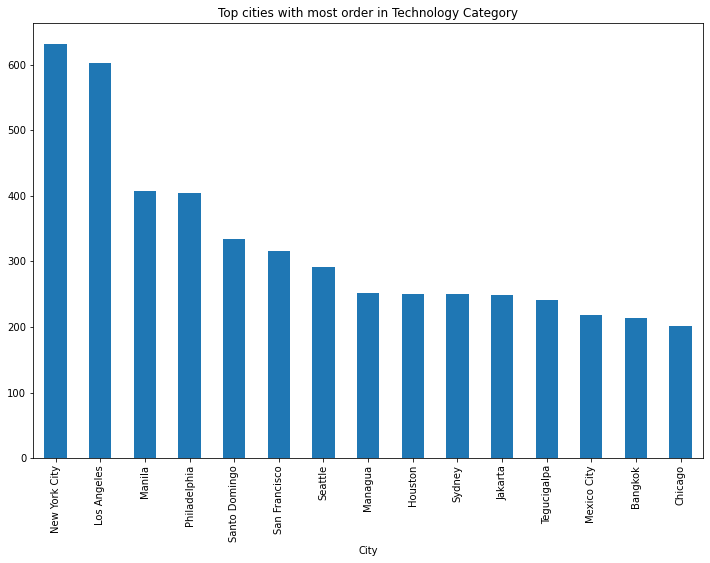

In [307]:
Technology = retail_data.loc[(retail_data.Category == 'Technology')]

# Top 15 cities with the highest order
top_tech = Technology.groupby('City')['Quantity'].sum().reset_index().nlargest(15,columns = "Quantity")
top_tech.groupby('City')['Quantity'].sum().sort_values(ascending=False).plot(kind="bar", figsize=(12,8), title="Top cities with most order in Technology Category")
plt.show()

New York made the highest order with 3 seperate Categories.

12. which products are making loss?

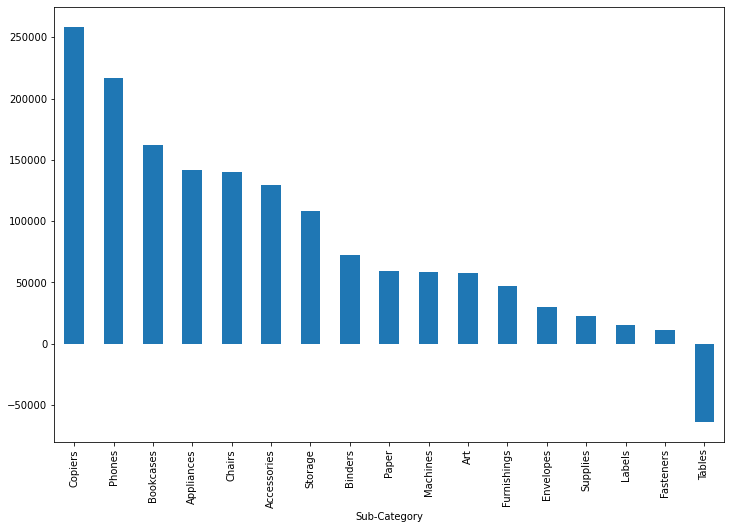

In [308]:
retail_data.groupby("Sub-Category")["Profit"].sum().sort_values(ascending=False).plot(kind="bar", figsize=(12,8))
plt.show()

Tables are making least profit, We dig deep to its Causation.

In [309]:
product_name = pd.DataFrame(retail_data.groupby("Product Name")["Profit"].sum().nsmallest(15))
product_name

,Profit
Product Name,
Cubify CubeX 3D Printer Double Head Print,-8879.9704
Lexmark MX611dhe Monochrome Laser Printer,-4589.9730
"Motorola Smart Phone, Cordless",-4447.0380
Cubify CubeX 3D Printer Triple Head Print,-3839.9904
"Bevis Round Table, Adjustable Height",-3649.8940
"Bevis Computer Table, Fully Assembled",-3509.5638
"Rogers Lockers, Blue",-2893.4908
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases,-2876.1156
"Bevis Wood Table, with Bottom Storage",-2782.5880


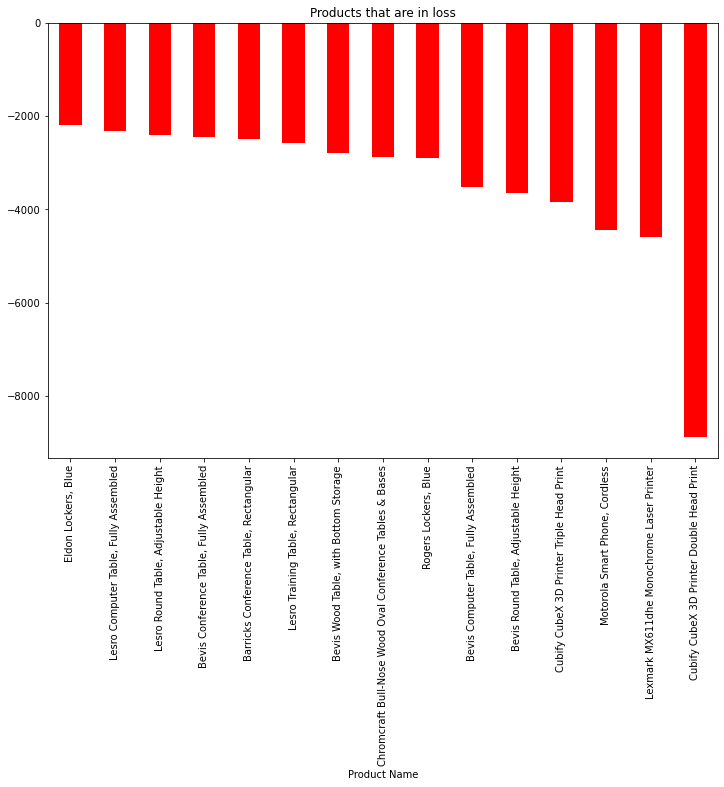

In [310]:
retail_data.groupby("Product Name")["Profit"].sum().nsmallest(15).sort_values(ascending=False).plot(kind="bar",color= "red",title="Products that are in loss", figsize=(12,8))
plt.show()

The graph above shows the various products with least profit.

13. Which segment provides more profit?

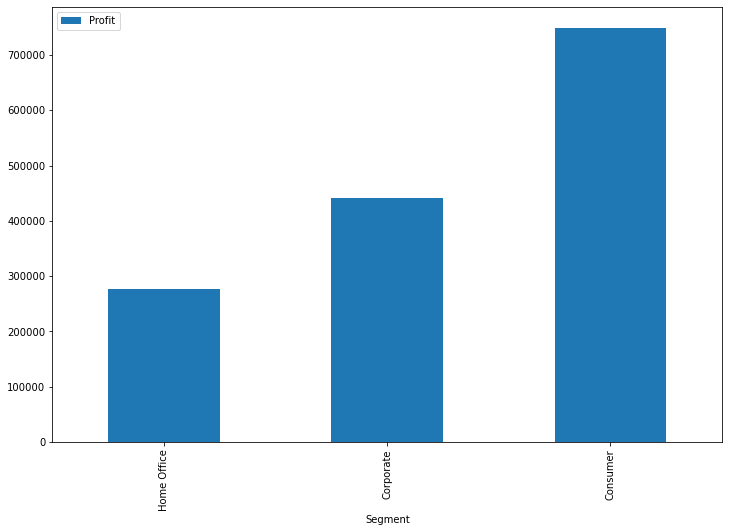

In [311]:
x = retail_data.groupby(by='Segment')[['Profit']].sum()
y = x.sort_values(by=['Profit'],ascending=True)

y.plot(kind='bar', figsize=(12,8))
plt.show()

Consumer Segment brings in the highest profit followed by Corporate then Home Office.

14. what is the correlation between quantity and profit?

In [312]:
corr = retail_data['Quantity'].corr(retail_data['Profit'])
print("Correlation between Quantity and Profit is: ", round(corr, 2))

Correlation between Quantity and Profit is:  0.1


16. Which order priority yields more sales?

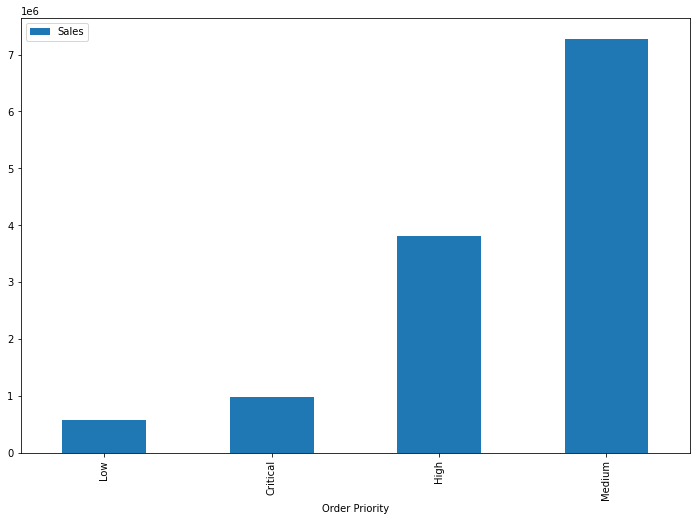

In [313]:
x = retail_data.groupby(by='Order Priority')[['Sales']].sum()
y = x.sort_values(by=['Sales'],ascending=True)
y.plot(kind='bar', figsize=(12,8))
plt.show()

Medium yields the highest Sales, then High and the rest.

17. What is the Average shipping cost to each region?

In [314]:
shipping_region = pd.DataFrame(retail_data.groupby(by="Region")['Shipping Cost'].agg(np.mean).sort_values(ascending=False))

# Regions with highest Average shipping cost
shipping_region

,Shipping Cost
Region,
North Asia,40.646112
Central Asia,38.003003
Oceania,34.593780
Southeast Asia,29.937948
North,27.476299
Central,26.710494
East,25.542001
South,25.353509
West,23.887687


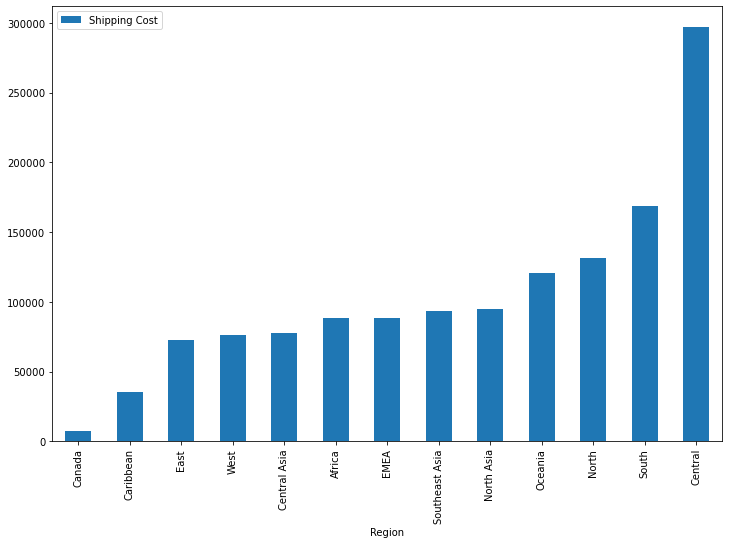

In [315]:
x = retail_data.groupby(by='Region')[['Shipping Cost']].sum()
y = x.sort_values(by=['Shipping Cost'],ascending=True)
y.plot(kind='bar', figsize=(12,8))
plt.show()